# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
%matplotlib inline

In [68]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Import the dataset

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
df = pd.read_csv(filepath, header=None)
print(df.head())

     0   1          2   3   4   5       6    7   8    9     10    11
0  Acer   4  IPS Panel   2   1   5   35.56  1.6   8  256   1.6   978
1  Dell   3    Full HD   1   1   3  39.624  2.0   4  256   2.2   634
2  Dell   3    Full HD   1   1   7  39.624  2.7   8  256   2.2   946
3  Dell   4  IPS Panel   2   1   5  33.782  1.6   8  128  1.22  1244
4    HP   4    Full HD   2   1   7  39.624  1.8   8  256  1.91   837


In [3]:
# create headers list
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = headers
print(df.head(10))

  Manufacturer  Category     Screen  GPU  OS  CPU_core Screen_Size_cm  \
0         Acer         4  IPS Panel    2   1         5          35.56   
1         Dell         3    Full HD    1   1         3         39.624   
2         Dell         3    Full HD    1   1         7         39.624   
3         Dell         4  IPS Panel    2   1         5         33.782   
4           HP         4    Full HD    2   1         7         39.624   
5         Dell         3    Full HD    1   1         5         39.624   
6           HP         3    Full HD    3   1         5         39.624   
7         Acer         3  IPS Panel    2   1         5           38.1   
8         Dell         3    Full HD    1   1         5         39.624   
9         Acer         3  IPS Panel    3   1         7           38.1   

   CPU_frequency  RAM_GB  Storage_GB_SSD Weight_kg  Price  
0            1.6       8             256       1.6    978  
1            2.0       4             256       2.2    634  
2            2.7

In [4]:
df.replace('?',np.nan, inplace = True)
print(df.dtypes)

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm     object
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg          object
Price               int64
dtype: object


In [5]:
#statistical description of the dataset
print(df.describe(include='all'))

       Manufacturer    Category   Screen         GPU          OS    CPU_core  \
count           238  238.000000      238  238.000000  238.000000  238.000000   
unique           11         NaN        2         NaN         NaN         NaN   
top            Dell         NaN  Full HD         NaN         NaN         NaN   
freq             71         NaN      161         NaN         NaN         NaN   
mean            NaN    3.205882      NaN    2.151261    1.058824    5.630252   
std             NaN    0.776533      NaN    0.638282    0.235790    1.241787   
min             NaN    1.000000      NaN    1.000000    1.000000    3.000000   
25%             NaN    3.000000      NaN    2.000000    1.000000    5.000000   
50%             NaN    3.000000      NaN    2.000000    1.000000    5.000000   
75%             NaN    4.000000      NaN    3.000000    1.000000    7.000000   
max             NaN    5.000000      NaN    3.000000    2.000000    7.000000   

       Screen_Size_cm  CPU_frequency   

In [6]:
#summary information of the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    object 
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    object 
 11  Price           238 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.4+ KB
None


# Data Wrangling

In [7]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [8]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

   Manufacturer  Category  Screen    GPU     OS  CPU_core  Screen_Size_cm  \
0         False     False   False  False  False     False           False   
1         False     False   False  False  False     False           False   
2         False     False   False  False  False     False           False   
3         False     False   False  False  False     False           False   
4         False     False   False  False  False     False           False   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          False   False           False      False  False  
1          False   False           False      False  False  
2          False   False           False      False  False  
3          False   False           False      False  False  
4          False   False           False      False  False  
Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: 

In [9]:
# replacing missing data with mean
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)

common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

In [10]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

In [11]:
# Data standardization: convert weight from kg to pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [12]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [13]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

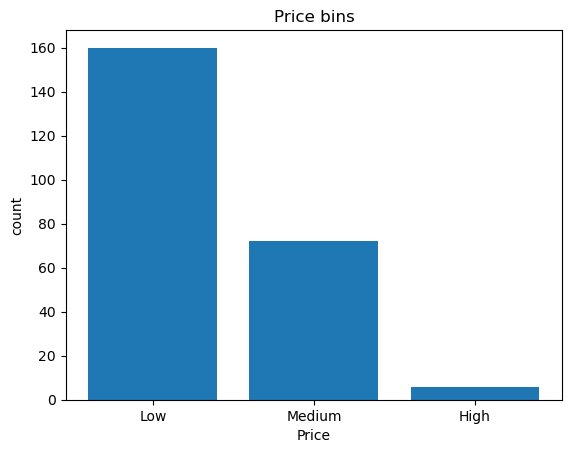

In [14]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [15]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

print(df.head())

  Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  CPU_frequency  \
0         Acer         4    2   1         5              14.0       0.551724   
1         Dell         3    1   1         3              15.6       0.689655   
2         Dell         3    1   1         7              15.6       0.931034   
3         Dell         4    2   1         5              13.3       0.551724   
4           HP         4    2   1         7              15.6       0.620690   

   RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  Screen-Full_HD  \
0       8             256        3.52800    978          Low           False   
1       4             256        4.85100    634          Low            True   
2       8             256        4.85100    946          Low            True   
3       8             128        2.69010   1244          Low           False   
4       8             256        4.21155    837          Low            True   

   Screen-IPS_panel  
0              T

# Exploratory Data Analysis (EDA)

(0.0, 3974.15)

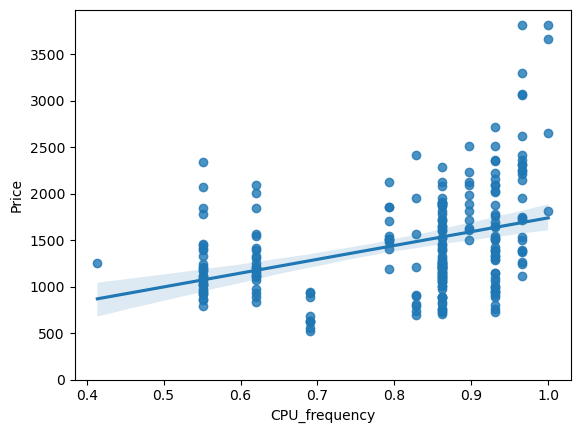

In [16]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

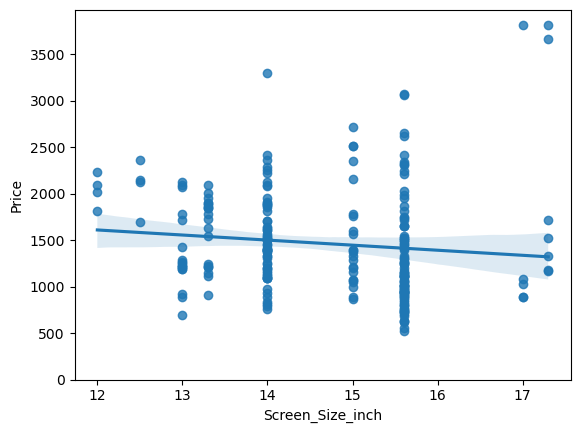

In [17]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

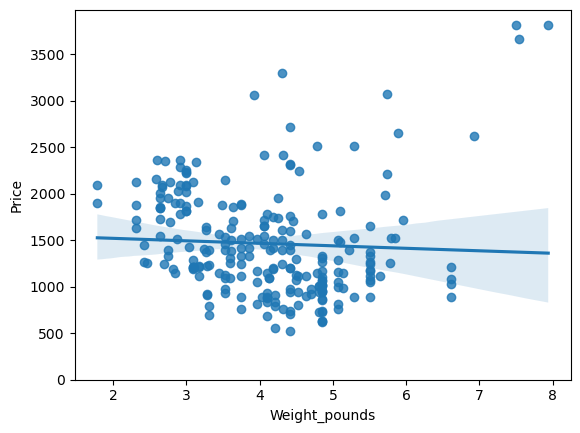

In [18]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)


In [19]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='Category', ylabel='Price'>

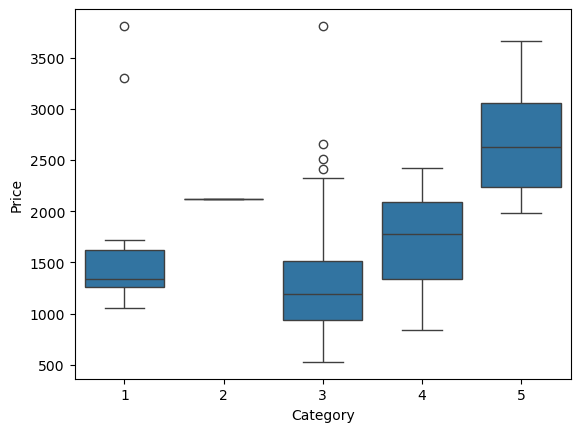

In [20]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

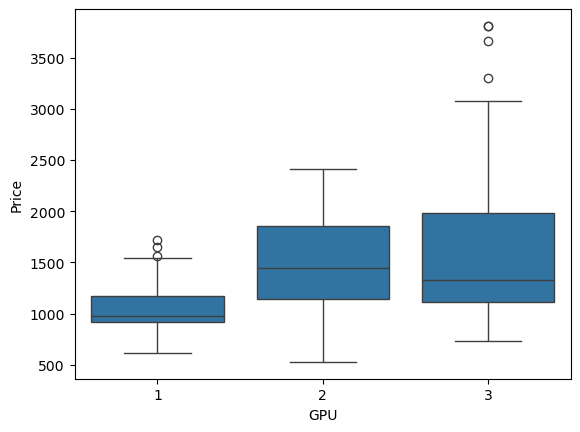

In [21]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

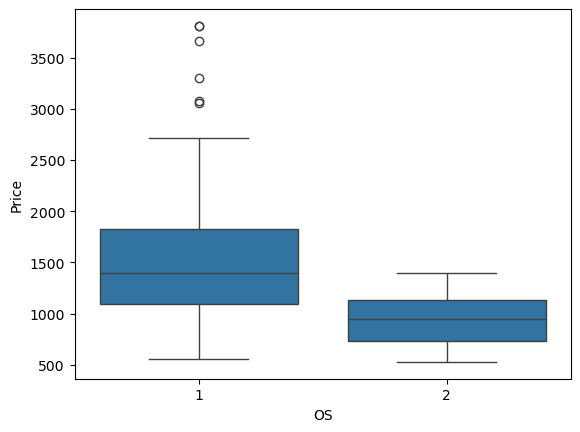

In [22]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

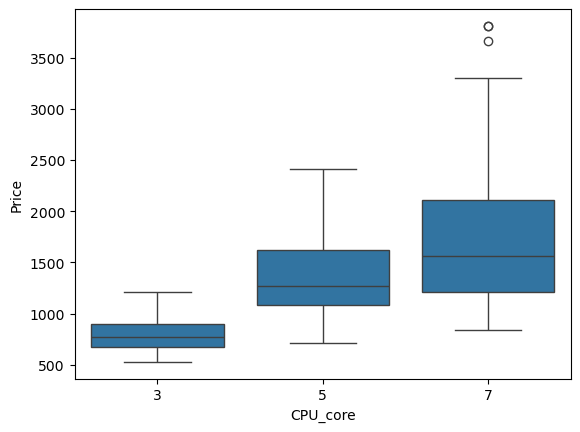

In [23]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

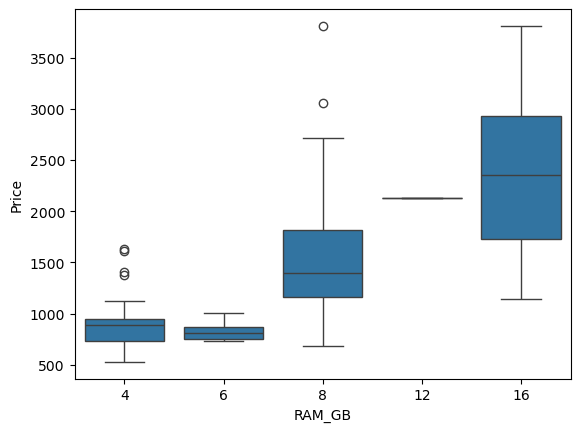

In [24]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

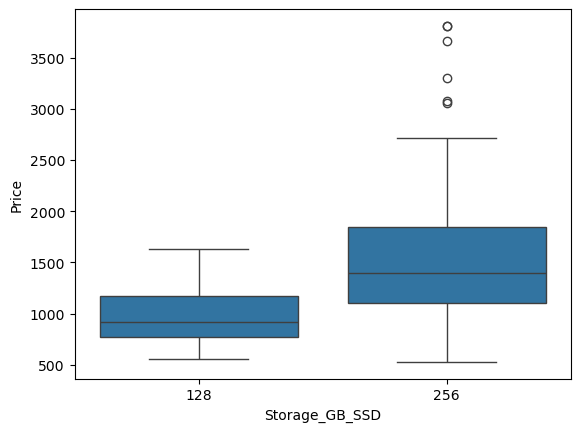

In [25]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [26]:
print(df.describe())
print(df.describe(include=['object']))

         Category         GPU          OS    CPU_core  Screen_Size_inch  \
count  238.000000  238.000000  238.000000  238.000000        238.000000   
mean     3.205882    2.151261    1.058824    5.630252         14.688655   
std      0.776533    0.638282    0.235790    1.241787          1.166045   
min      1.000000    1.000000    1.000000    3.000000         12.000000   
25%      3.000000    2.000000    1.000000    5.000000         14.000000   
50%      3.000000    2.000000    1.000000    5.000000         15.000000   
75%      4.000000    3.000000    1.000000    7.000000         15.600000   
max      5.000000    3.000000    2.000000    7.000000         17.300000   

       CPU_frequency      RAM_GB  Storage_GB_SSD  Weight_pounds        Price  
count     238.000000  238.000000      238.000000     238.000000   238.000000  
mean        0.813822    7.882353      245.781513       4.106221  1462.344538  
std         0.141860    2.482603       34.765316       1.078442   574.607699  
min     

In [27]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)


   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [28]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


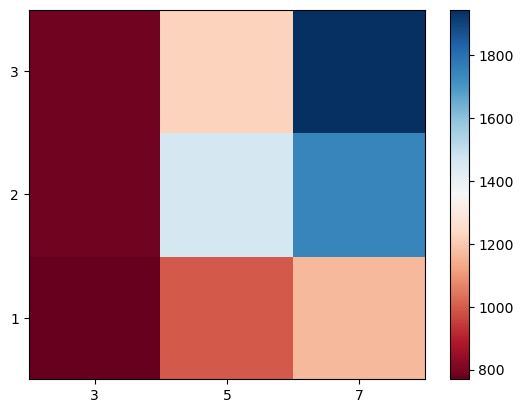

In [29]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [30]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857845  with a P-value of P = 3.681560628842711e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713296e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118303  with a P-value of P = 0.08853397846830549
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.050312258377515504  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355117  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827376  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  

# Model Development

In [31]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

C:\Users\samy\AppData\Local\Temp\ipykernel_7292\1680302107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
C:\Users\samy\AppData\Local\Temp\ipykernel_7292\1680302107.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

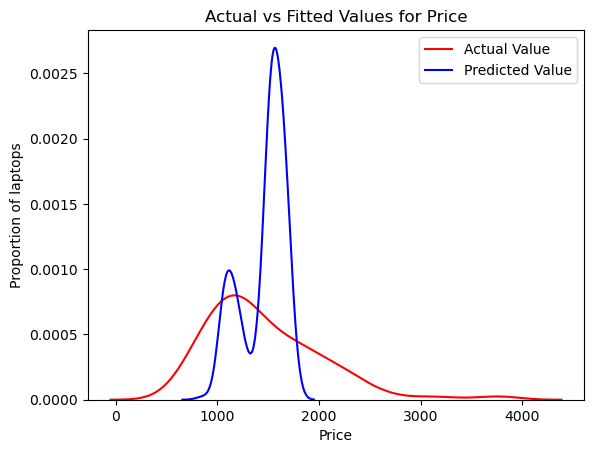

In [32]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [33]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [34]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

C:\Users\samy\AppData\Local\Temp\ipykernel_7292\2161552462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
C:\Users\samy\AppData\Local\Temp\ipykernel_7292\2161552462.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0, 0.5, 'Proportion of laptops')

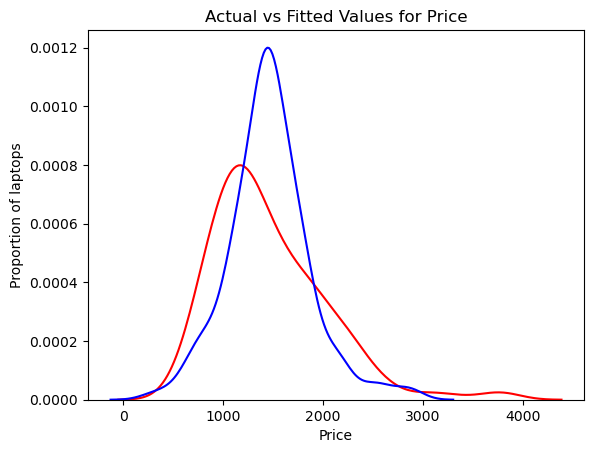

In [35]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

C:\Users\samy\AppData\Local\Temp\ipykernel_7292\4061701695.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
C:\Users\samy\AppData\Local\Temp\ipykernel_7292\4061701695.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0, 0.5, 'Proportion of laptops')

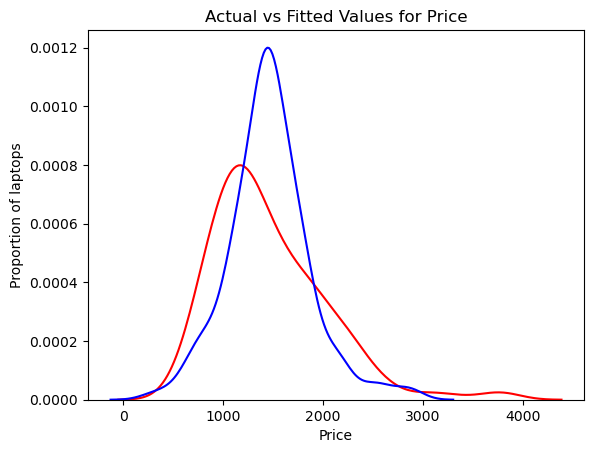

In [36]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [37]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [38]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

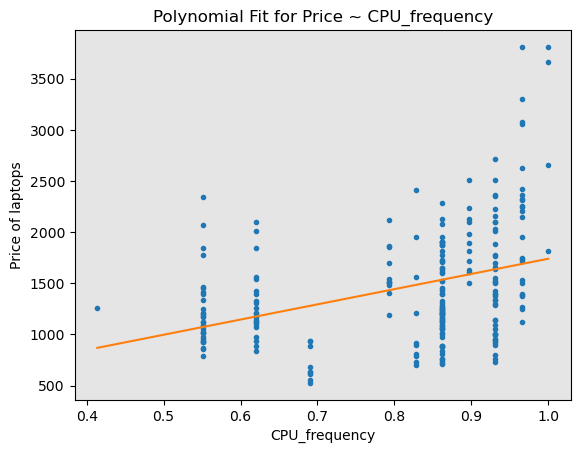

In [39]:
PlotPolly(p1, X, Y, 'CPU_frequency')

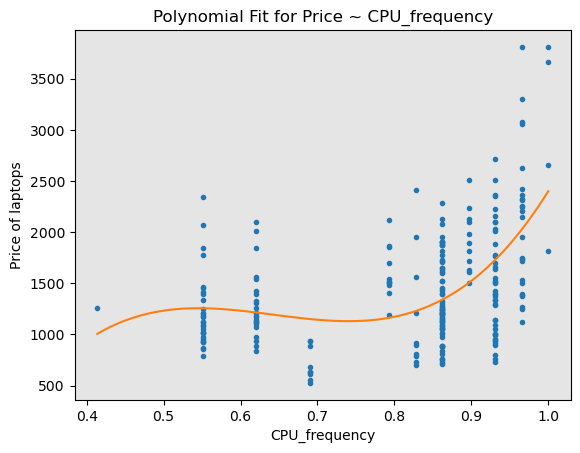

In [40]:
PlotPolly(p3, X, Y, 'CPU_frequency')

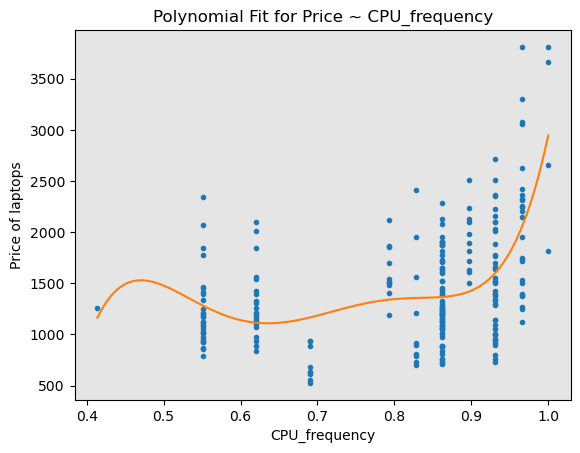

In [41]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [42]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653121
The MSE value for 3rd degree polynomial is:  241024.86303848738
The R-square value for 5th degree polynomial is:  0.3030822706443189
The MSE value for 5th degree polynomial is:  229137.29548055844


In [43]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [44]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  122978.3071822479
R^2 for multi-variable polynomial pipeline is:  0.6259632792570449


# Model Refinement

In [45]:
y_data = df['Price']
x_data = df.drop('Price',axis=1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
lre=LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

number of test samples : 24
number of training samples: 214
-0.06599437350393766
0.14829792099817962
The mean of the folds are -0.16109232388595102 and the standard deviation is 0.3849579786664708


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))                                                    

Text(0.5, 1.0, 'R^2 Using Test Data')

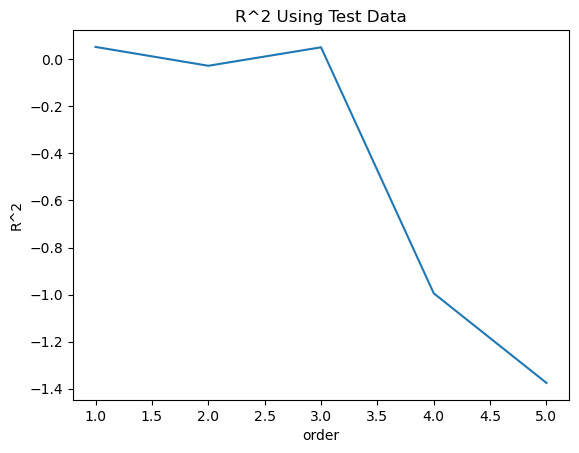

In [48]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [49]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████████████████████████████████████| 999/999 [00:04<00:00, 220.48it/s, Test Score=0.423, Train Score=0.669]


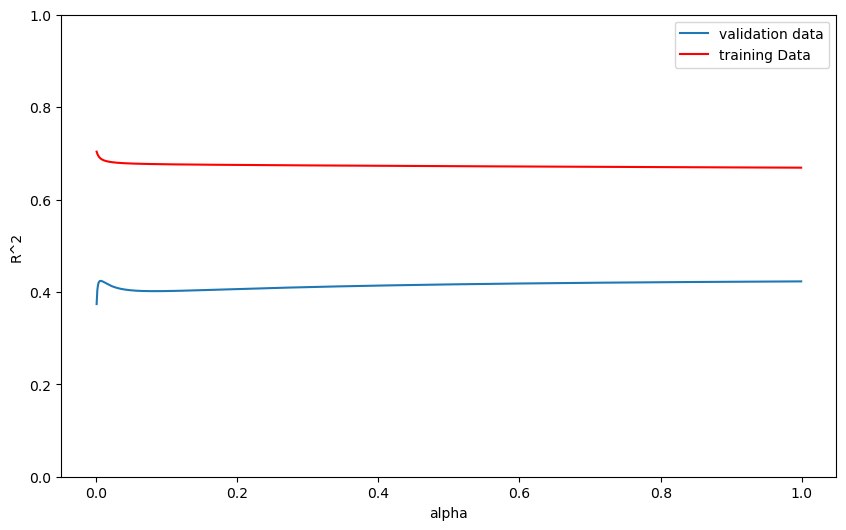

In [50]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [51]:
parameters1 = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
RR = Ridge()

Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

BestRR = Grid1.best_estimator_

print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

0.3009905048691818
